<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aprendizaje supervizado: Regresión Logística 

> La **regresión logística** es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama **regresión logística simple** cuando solo hay una variable independiente y **regresión logística múltiple*** cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como **regresores, predictores o features**.

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

- Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

- Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.

Para evitar estos problemas, la **regresión logística** transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1 (función sigmoide). 

> Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

$$sigmoide = \sigma(y) = \frac{1}{1+e^{-y}}$$

<img style="float: center;;" src='Figures/sigmoide.png' width="500" height="100"/></a>


> Para valores de $y$  positivos muy grandes,  $e^{−y}$  es aproximadamente 0, por lo que el valor de la función sigmoide es 1. Para valores de  $y$ negativos muy grandes,  $e^{−y}$  tiende a infinito, por lo que el valor de la función sigmoide es 0.

> Sustituyendo la  y  de la ecuación anterior por la función de un modelo lineal $y=\beta_0 + \beta_1 x_1 + ... + \beta_p x_p$ se obtiene que:

$$P(y=1|X=x) = \frac{e^{\beta_0 + \beta_1x_1 +...+\beta_px_p}}{1 + e^{\beta_0 + \beta_1x_1 +...+\beta_px_p}}$$

> donde $P(y=1|X=x)$ puede interpretarse como la probabilidad de que la variable respuesta  y  adquiera el valor 1 (clase de referencia), dado los predictores $x_1,...,x_p$. El modelo resultante tiene los coeficientes de regresión en los exponentes, por lo que no es un modelo lineal.

> La expresión obtenida tiene la característica de ser siempre positiva, ya que la función exponencial solo toma valores positivos y, el cociente de valores positivos, es siempre positivo. Esto hace posible aplicarle el logaritmo:

$$ln(\frac{P(y=1|X=x)}{P(y=0|X=x)}) = \beta_0 + \beta_1x_1 +...+\beta_px_p$$

> Al realizar la transformación, en el lado derecho se obtiene la ecuación de un modelo lineal. El término de la izquierda resulta ser el logaritmo de un cociente de probabilidades, lo que se conoce como razón de probabilidad (log of odds).

> Como resultado de este proceso se consigue convertir un problema de clasificación no lineal, en un problema de regresión lineal que sí puede ajustarse mediante los métodos convencionales.



### Función de Costo

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{y}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{y}(x^{(i)}))]$$

### Ejemplos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import scipy.optimize as opt

In [2]:
X, y = make_blobs(n_samples = 200, centers =[[0,0],[3,3]], cluster_std = 0.5, n_features=2)


Text(0, 0.5, 'x2')

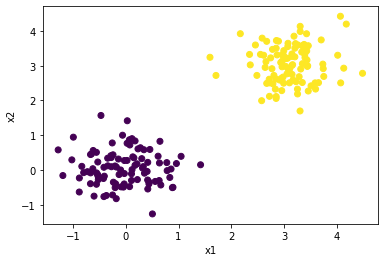

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')

In [6]:
# Definir las funciones para el entrenamiento de la Reg. Logística

#Función logística g(z) = 1/(1+exp(-z))
def fun_logistica(z):
    return 1/(1+np.exp(-z))

In [7]:
# z = b0 + b1x1+ b2x2 +...+bnxn = X*B^T
# y_hat = g(z) = g(b0 + b1x1+ b2x2 +...+bnxn) = 1/(1+exp(-(b0 + b1x1+ b2x2 +...+bnxn))))

def reg_lineal(B, X):
    z = np.matrix(X)*np.matrix(B).transpose()
    y_hat = np.array(fun_logistica(z))
    return y_hat[:,0]


$$J(\beta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{y}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{y}(x^{(i)}))]$$

In [8]:
# Función de costo
def fun_cost(B,X, y):
    m = len(y)
    y_hat = reg_lineal(B, X)
    J = (-1/m)*np.sum(y*np.log(y_hat) +(1-y)*np.log(1-y_hat))
    return J
    

In [ ]:
# Inicializar las variables
# Xa=[1;x1;x2] = [1;X]
# B = [b0,b1,b2]
# z = b0 + b1x1 + b2x2 = X*B^T


In [11]:
Xa = np.append(np.ones((len(y),1)), X, axis=1)

In [12]:
Xa

array([[ 1.00000000e+00,  2.12556000e-01,  1.77526024e-01],
       [ 1.00000000e+00,  2.76989896e+00,  2.91501436e+00],
       [ 1.00000000e+00,  6.84193253e-02,  8.69726343e-01],
       [ 1.00000000e+00, -5.30244684e-01,  2.29230736e-01],
       [ 1.00000000e+00, -2.75860772e-01,  3.57298109e-01],
       [ 1.00000000e+00,  3.14795901e+00,  3.26906847e+00],
       [ 1.00000000e+00,  3.03565768e+00,  3.20749812e+00],
       [ 1.00000000e+00,  3.37979112e+00,  3.61346013e+00],
       [ 1.00000000e+00,  2.74568417e+00,  3.22694875e+00],
       [ 1.00000000e+00,  2.72289517e+00,  2.12018129e+00],
       [ 1.00000000e+00,  4.40329836e-01, -3.46847765e-01],
       [ 1.00000000e+00, -6.01305713e-01, -7.52585845e-01],
       [ 1.00000000e+00,  3.26494114e+00,  3.59601371e+00],
       [ 1.00000000e+00, -6.24621432e-01,  3.66610247e-02],
       [ 1.00000000e+00,  2.67104372e+00,  2.49275952e+00],
       [ 1.00000000e+00,  3.07041272e+00,  3.55363043e+00],
       [ 1.00000000e+00,  3.45783182e+00

In [13]:
m,n = np.shape(Xa)

B = np.zeros(n)

In [14]:
B

array([0., 0., 0.])

In [16]:
# Realizar la optimización (el entrenamiento del modelo)
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [17]:
solucion = opt.minimize(fun_cost, B, args=(Xa,y))


<ipython-input-8-b08dbeb360ca>:5: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*np.sum(y*np.log(y_hat) +(1-y)*np.log(1-y_hat))
<ipython-input-8-b08dbeb360ca>:5: RuntimeWarning: invalid value encountered in multiply
  J = (-1/m)*np.sum(y*np.log(y_hat) +(1-y)*np.log(1-y_hat))
<ipython-input-6-f20dba7c0099>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-8-b08dbeb360ca>:5: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*np.sum(y*np.log(y_hat) +(1-y)*np.log(1-y_hat))
<ipython-input-8-b08dbeb360ca>:5: RuntimeWarning: invalid value encountered in multiply
  J = (-1/m)*np.sum(y*np.log(y_hat) +(1-y)*np.log(1-y_hat))
<ipython-input-6-f20dba7c0099>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-6-f20dba7c0099>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-8-b08dbeb360ca>:5: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*np.sum(

In [21]:
solucion

      fun: nan
 hess_inv: array([[327114.57529248, -98368.45015347, -73765.04704474],
       [-98368.45015347,  29582.15754914,  22182.53025841],
       [-73765.04704474,  22182.53025841,  16635.41669459]])
      jac: array([nan, nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 520
      nit: 19
     njev: 130
   status: 2
  success: False
        x: array([-4308.72595743,  1296.22677316,   972.16076528])

In [18]:
B = solucion.x

In [19]:
B

array([-4308.72595743,  1296.22677316,   972.16076528])

### Modelo matemático optenido por la reg logística
$$z=-4308.72595743 + 1296.22677316x1 + 972.16076528x2$$
$$\hat{y} = \frac{1}{1 + e^{(4308.72595743- 1296.22677316x1 - 972.16076528x2)}} \in [0,1]$$

In [22]:
# Evaluación del modelo
y_hat_pred = np.round(reg_lineal(B,Xa))
y_hat_pred 

<ipython-input-6-f20dba7c0099>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


array([0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.])

<ipython-input-6-f20dba7c0099>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


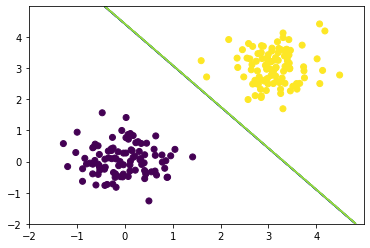

In [25]:
#graficar el contorno o frontera de separación de las clases

xx = np.arange(-2,5,0.01) 
yy = np.arange(-2,5,0.01)

Xm, Ym = np.meshgrid(xx,yy)
m,n=np.shape(Xm)

Xmr= np.reshape(Xm, (m*n,1))
Ymr= np.reshape(Ym, (m*n,1))

Xtmp = np.append(Xmr,Ymr, axis=1)

Xtmp = np.append(np.ones((len(Xmr),1)), Xtmp, axis=1)

Ytmp = np.round(reg_lineal(B,Xtmp),0)

Z = np.reshape(Ytmp,(m,n))
plt.contour(Xm,Ym,Z)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()


In [28]:
#Xnew = [1,1],
#       [-1,3],
#       [4,2]

# Predicción de datos nuevos
X_new = np.array([[1,1,1],
                 [1,-1,3],
                 [1,4,2]])

yhat = np.round(reg_lineal(B,X_new))
yhat



<ipython-input-6-f20dba7c0099>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


array([0., 0., 1.])

## Ejemplo 2: Realizar el ejemplo anterior utilizando las librerías de sklearn

In [30]:
from sklearn import linear_model
from sklearn.metrics import (accuracy_score, precision_score, recall_score)


In [32]:
modelo = linear_model.LogisticRegression()

In [33]:
modelo.fit(X, y)

LogisticRegression()

In [34]:
Yhat = modelo.predict(X)
Yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0])

In [35]:
accuracy_score(y,Yhat)

1.0

In [36]:
precision_score(y, Yhat)

1.0

In [37]:
recall_score(y,Yhat)

1.0

In [41]:
# Predecir datos nuevos (muestras nuevas)
X_new = np.array([[1,1,1],
                 [1,-1,3],
                 [1,4,2]])



Text(0, 0.5, 'x2')

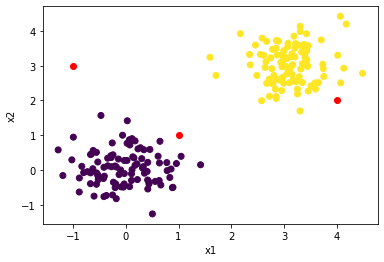

In [45]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(X_new[:,1],X_new[:,2], c='r')
plt.xlabel('x1')
plt.ylabel('x2')

In [46]:
yhat_predict = modelo.predict(X_new[:,1:])
yhat_predict

array([0, 0, 1])

In [ ]:
#Dibujar la frontera de separación


### Ejemplo 3:  RgresiónLogística (datos que no son linealmente separables)

In [47]:
dataset = pd.read_csv('Data/ex2data2.txt', header=None)

In [48]:
dataset.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [50]:
#Preparar los datos para la transformación del polinomio
X = dataset.iloc[:,:2]
y = dataset.iloc[:,2]

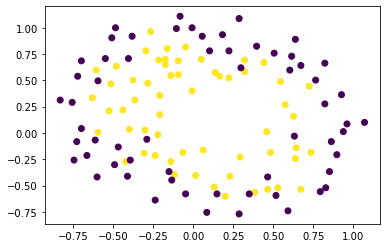

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(X[0],X[1], c=y)
plt.show()

In [52]:
#Preparar los datos para la transformación a un polinomio
from sklearn.preprocessing import PolynomialFeatures

In [69]:
poly = PolynomialFeatures(10)
Xa = poly.fit_transform(X)


In [70]:
X

,0,1
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [71]:
Xa

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         1.50756332e-04,  2.05713421e-03,  2.80704704e-02],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         4.16651692e-04, -3.07715393e-03,  2.27261199e-02],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         2.40853745e-03, -7.80174092e-03,  2.52714199e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.33324699e-01, -4.81276442e-01,  9.92723934e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         3.99160874e-05, -6.29489121e-03,  9.92723934e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.08646006e-13, -1.49344370e-14,  7.22631762e-16]])

In [72]:
#Xa
# X[x1,x2]
# Xa = [1, x1, x2, x1*x2, x1^2, x2^2]
# Yhat(x) = 1/(1 +e^(b0 +b1x1^2 +b2x2^2 + b3x1x2 + b4x1 + b5x2))


In [83]:
# Crear modelo de reg logística C=1/\labda
modelo = linear_model.LogisticRegression(C=1e3)

#Entrenar al modelo
modelo.fit(Xa,y)
#Predicción


/home/gaddiel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000.0)

In [84]:
Y_hat = modelo.predict(Xa)
Y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [85]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
accuracy_score(y,Y_hat)

0.8813559322033898

In [87]:
#Graficar la frontera de separación
xmin,xmax,ymin,ymax= X[0].min(), X[0].max(), X[1].min(), X[1].max()
xx,yy = np.meshgrid(np.arange(xmin,xmax,0.01), np.arange(ymin,ymax,0.01))
Xnew = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])


In [88]:
yy

array([[-0.76974, -0.76974, -0.76974, ..., -0.76974, -0.76974, -0.76974],
       [-0.75974, -0.75974, -0.75974, ..., -0.75974, -0.75974, -0.75974],
       [-0.74974, -0.74974, -0.74974, ..., -0.74974, -0.74974, -0.74974],
       ...,
       [ 1.08026,  1.08026,  1.08026, ...,  1.08026,  1.08026,  1.08026],
       [ 1.09026,  1.09026,  1.09026, ...,  1.09026,  1.09026,  1.09026],
       [ 1.10026,  1.10026,  1.10026, ...,  1.10026,  1.10026,  1.10026]])

In [89]:
yy.ravel()

array([-0.76974, -0.76974, -0.76974, ...,  1.10026,  1.10026,  1.10026])

In [90]:
Xnew

,0,1
0,-0.83007,-0.76974
1,-0.82007,-0.76974
2,-0.81007,-0.76974
3,-0.80007,-0.76974
4,-0.79007,-0.76974
...,...,...
35903,1.02993,1.10026
35904,1.03993,1.10026
35905,1.04993,1.10026
35906,1.05993,1.10026


In [91]:
Xa_new = poly.fit_transform(Xnew)
Z = modelo.predict(Xa_new)
Z = Z.reshape(xx.shape)

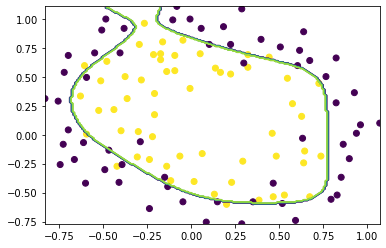

Accuracy:  0.8813559322033898
precision:  0.8548387096774194
Recall:  0.9137931034482759


In [92]:
#Encontrar el mejor polinomio que se ajusta a nuestros datos
plt.figure(figsize=(6,4))
plt.scatter(X[0],X[1], c=y)
plt.contour(xx,yy,Z)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()
print('Accuracy: ', accuracy_score(y,Y_hat))
print('precision: ', precision_score(y,Y_hat))
print('Recall: ', recall_score(y,Y_hat))

In [96]:
X

,0,1
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


/home/gaddiel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaddiel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

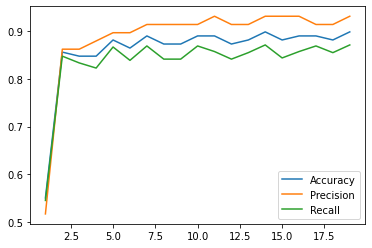

In [95]:
modelo = linear_model.LogisticRegression(C=1e5)
grados = np.arange(1,20)

Accu = np.zeros(grados.shape)
Prec = np.zeros(grados.shape)
Recall = np.zeros(grados.shape)

for ngrados in grados:
    poly = PolynomialFeatures(ngrados)
    Xa = poly.fit_transform(X)
    modelo.fit(Xa,y)
    Yhat = modelo.predict(Xa)
    
    Accu[ngrados-1] = accuracy_score(Yhat,y)
    Prec[ngrados-1] = precision_score(Yhat,y)
    Recall[ngrados-1] = recall_score(Yhat,y)

plt.plot(grados,Accu)
plt.plot(grados,Prec)
plt.plot(grados,Recall)
plt.legend(('Accuracy', 'Precision', 'Recall'), loc='best')
plt.show()


### Actividad: Social_Network_Adds

In [ ]:
# 1.- Estandarizar los datos (StandardScaler) x_std = (x - x.mean())/x.std()
# 2.- Utilizando las librerías de sklearn, encontrar un modelo de reg. logística 
# (X, Xa)
# 3.- El modelo encontrado tenga un accuracy mayor al 85% 
# 4.- Predecir datos nuevos (clientes nuevos) C_new =[35, 58000]
